In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16 as pretrained , preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD , Adam
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the dataset and unzipping it
zip_file = '/content/drive/MyDrive/archive.zip'
import zipfile
with zipfile.ZipFile(zip_file, 'r') as z:
  z.extractall('/content/data')

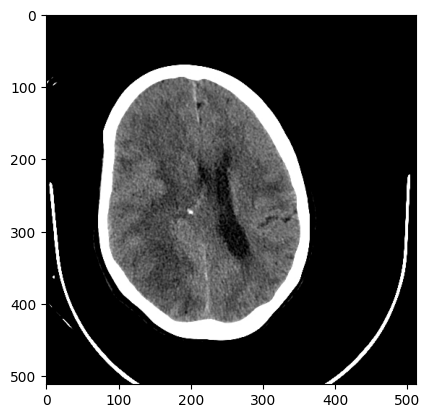

In [ ]:
#plotting the sample image
plt.imshow(image.load_img('/content/data/Dataset/Brain Tumor CT scan Images/Healthy/ct_healthy (100).jpg'))
plt.show()

In [ ]:
!rm '/content/data/Dataset/Brain Tumor CT scan Images/CT image source.txt'
!rm '/content/data/Dataset/Brain Tumor MRI images/MRI image source.txt'

In [ ]:
image_size = [224,224]
batch_size = 32

In [ ]:
#creating first for ct scan
dataset_ct = '/content/data/Dataset/Brain Tumor CT scan Images'

# creating imagedatagenerator instance with validation split of 80 20
gen = ImageDataGenerator(
    rescale = 1./225,
    validation_split = 0.2,
    preprocessing_function = preprocess_input
)

In [ ]:
# creating train data generator
train_gen = gen.flow_from_directory(
    dataset_ct,
    target_size = image_size,
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)


#creating test data generator
test_gen = gen.flow_from_directory(
    dataset_ct,
    target_size = image_size,
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 3695 images belonging to 2 classes.
Found 923 images belonging to 2 classes.


In [ ]:
# making model for ct scans
ptm_ct = pretrained(
    input_shape = image_size + [3],
    weights = 'imagenet',
    include_top = False
)

# freezing the layers of the model
ptm_ct.trainable = False

In [ ]:
# adding additional layers of the model
x = Flatten()(ptm_ct.output)
x = Dense(256, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

# creating the model
ct_model = Model(inputs = ptm_ct.input, outputs = x)

In [ ]:
# printing the model summary
ct_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# compiling the ct scan model
ct_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
# training the model
ct = ct_model.fit(
    train_gen,
    validation_data = test_gen,
    epochs = 5,
    steps_per_epoch = len(train_gen) // 2,
    validation_steps = len(test_gen) // 2,
    #callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10,restore_best_weights=True,verbose=1),tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=5,verbose=1)]
)

Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - accuracy: 0.7535 - loss: 1.7901 - val_accuracy: 0.9085 - val_loss: 0.3732
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.9624 - loss: 0.1217 - val_accuracy: 0.9397 - val_loss: 0.1638
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8889 - val_loss: 0.2693
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - accuracy: 0.9803 - loss: 0.0701 - val_accuracy: 0.9375 - val_loss: 0.1852
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9608 - loss: 0.1039 - val_accuracy: 0.9107 - val_loss: 0.2107


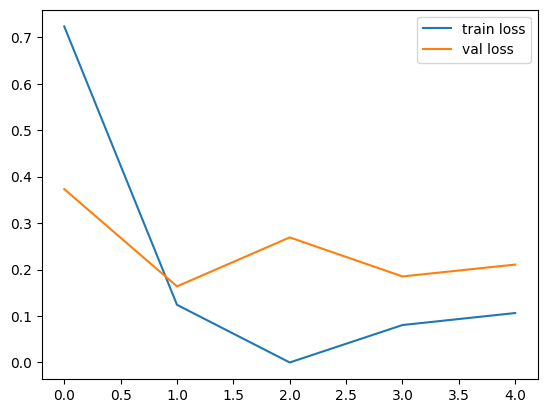

In [ ]:
# plotting loss metrics
plt.plot(ct.history['loss'], label='train loss')
plt.plot(ct.history['val_loss'], label='val loss')
plt.legend()
plt.show()

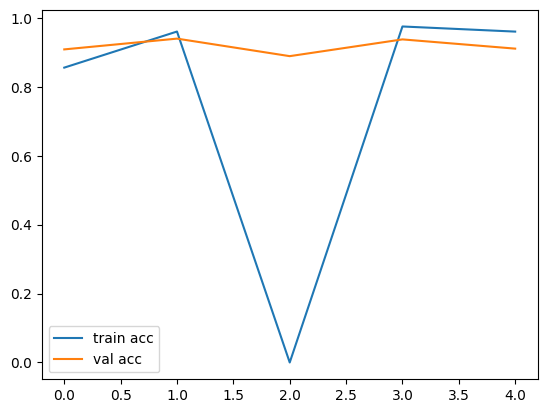

In [ ]:
# plotting accuracy
plt.plot(ct.history['accuracy'], label='train acc')
plt.plot(ct.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
#creating the model for mri scan
dataset_mri = '/content/data/Dataset/Brain Tumor MRI images'

# creating imagedatagenerator instance with 80 20 split
mri_gen = ImageDataGenerator(
    rescale = 1./225,
    validation_split = 0.2,
    preprocessing_function = preprocess_input
)

In [ ]:
#creating train data generator
mri_train_gen = mri_gen.flow_from_directory(
    dataset_mri,
    target_size = image_size,
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)


#creating test data generator
mri_test_gen = mri_gen.flow_from_directory(
    dataset_mri,
    target_size = image_size,
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#making model for mri scan
ptm_mri = pretrained(
    input_shape = image_size + [3],
    weights = 'imagenet',
    include_top = False
)

# freezing the layers of the model
ptm_mri.trainable = False

In [ ]:
# adding additional layers to the model
x = Flatten()(ptm_mri.output)
x = Dense(256, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

#creating the model
mri_model = Model(inputs = ptm_mri.input, outputs = x)

In [ ]:
#model summary
mri_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
#compiling the model
mri_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate= 0.01),
    metrics = ['accuracy']
)

In [ ]:
# training the model
mri = mri_model.fit(
    mri_train_gen,
    validation_data = mri_test_gen,
    epochs = 100,
    steps_per_epoch = len(mri_train_gen) // 2,
    validation_steps = len(mri_test_gen) // 2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10,restore_best_weights=True,verbose=1),tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=5,verbose=1)]
)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 192ms/step - accuracy: 0.9108 - loss: 0.6180 - val_accuracy: 0.9629 - val_loss: 0.1082 - learning_rate: 0.0100
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9605 - loss: 0.0976 - val_accuracy: 0.9016 - val_loss: 0.2911 - learning_rate: 0.0100
Epoch 3/100
 1/62 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9688 - loss: 0.0735

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.9688 - loss: 0.0735 - learning_rate: 0.0100
Epoch 4/100


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - accuracy: 0.9865 - loss: 0.0370 - val_accuracy: 0.9062 - val_loss: 0.3781 - learning_rate: 0.0100
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.9890 - loss: 0.0472 - val_accuracy: 0.9508 - val_loss: 0.1790 - learning_rate: 0.0100
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 1.0000 - loss: 0.0010 - learning_rate: 0.0100
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 174ms/step - accuracy: 0.9924 - loss: 0.0191 - val_accuracy: 0.9824 - val_loss: 0.0449 - learning_rate: 0.0100
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.9956 - loss: 0.0124 - val_accuracy: 0.9570 - val_loss: 0.1324 - learning_rate: 0.0100
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9688 - loss: 0.0281 - learning_rate: 0.0100
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 175ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9727 - val_loss: 0.1273 - learning_rate: 0.0100
Epoch 11/100
62/62 ━

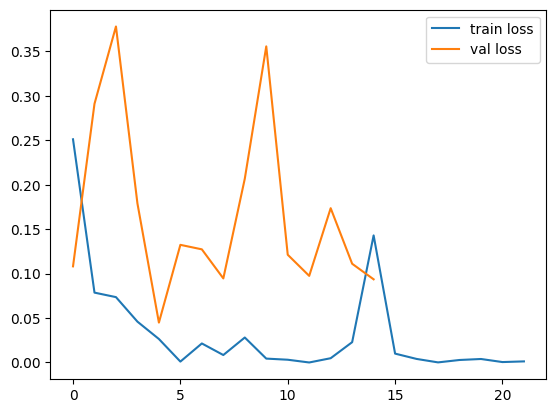

In [ ]:
# plotting loss
plt.plot(mri.history['loss'], label='train loss')
plt.plot(mri.history['val_loss'], label='val loss')
plt.legend()
plt.show()

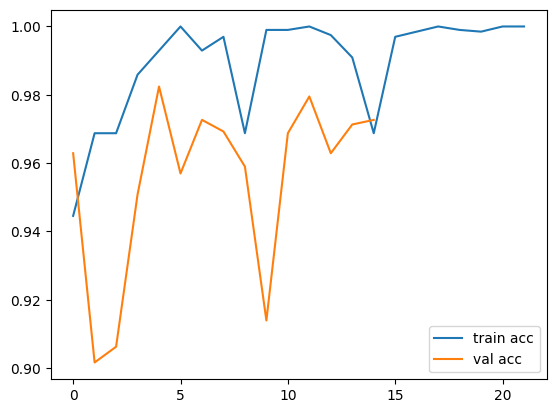

In [ ]:
#plotting accuracy
plt.plot(mri.history['accuracy'], label='train acc')
plt.plot(mri.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
ct_model.save('/content/drive/MyDrive/ct_model.keras')
mri_model.save('/content/drive/MyDrive/mri_model.keras')